## 1. Import Packages

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.ndimage import zoom
## pydot and graphviz 

## 2. Import datasets

In [3]:
path_dataset = np.load('../Datasets/pathmnist.npz')
print("Get object keys", pd.DataFrame(path_dataset).head())

Get object keys               0
0  train_images
1    val_images
2   test_images
3  train_labels
4    val_labels


## 3. Get images and labels

train_images dimensions (89996, 28, 28, 3)
val_images dimensions (10004, 28, 28, 3)
test_images dimensions (7180, 28, 28, 3)
train_labels dimensions (89996, 1)
val_labels dimensions (10004, 1)
test_labels dimensions (7180, 1)
10.407128930091858
10.566025227308273
11.511622369289398
11.557180434465408
8.895950764417648
13.536156713962555
8.762611448764801
10.446019470691681
14.317302405834198
10.405837744474411
10.565773397684097
11.515393853187561
11.555378139019012
8.896441757678986
13.534586131572723
8.766493201255798
10.445822030305862
14.314274489879608
18.63509714603424
11.796657741069794
4.721448570489883
8.830083906650543
14.415042102336884
8.245125412940979
10.320334136486053
5.863509699702263
17.17270165681839


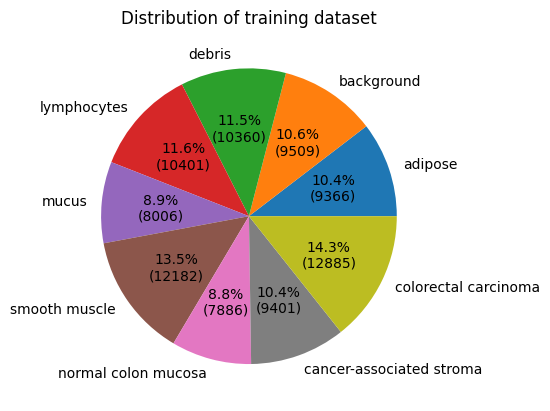

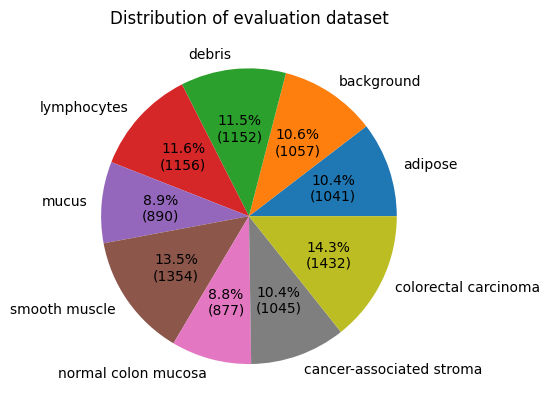

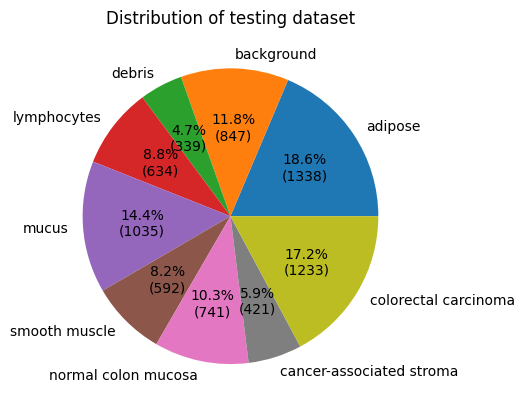

In [5]:
train_images = path_dataset['train_images']
print("train_images dimensions", np.shape(train_images))
val_images = path_dataset['val_images']
print("val_images dimensions", np.shape(val_images))
test_images = path_dataset['test_images']
print("test_images dimensions", np.shape(test_images))
train_labels = path_dataset['train_labels']
print("train_labels dimensions", np.shape(train_labels))
val_labels = path_dataset['val_labels']
print("val_labels dimensions", np.shape(val_labels))
test_labels = path_dataset['test_labels']
print("test_labels dimensions", np.shape(test_labels))

def getClassDistribution(label_array, title): 
  class_count = [0,0,0,0,0,0,0,0,0]
  for i in label_array:
      class_count[i[0]] += 1
  def my_fmt(x):
    print(x)
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)
  total =  sum(class_count)
  fig = plt.figure()
  plt.pie(class_count, labels=['adipose', 'background', 'debris', 'lymphocytes', 'mucus', 'smooth muscle','normal colon mucosa', 'cancer-associated stroma', 'colorectal carcinoma'], autopct=my_fmt) # colorectal adenocarcinoma epithelium
  plt.title(title)


getClassDistribution(train_labels, "Distribution of training dataset")
getClassDistribution(val_labels, "Distribution of evaluation dataset")
getClassDistribution(test_labels, "Distribution of testing dataset")

## 4. Display a image from the dataset

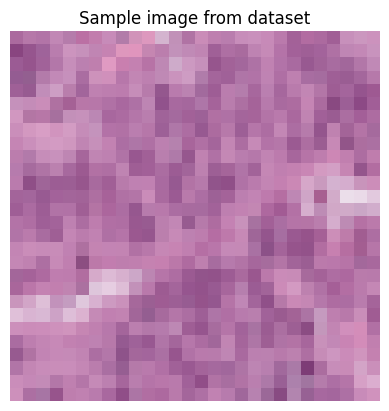

In [7]:
sample_image = train_images[0]
plt.imshow(sample_image, cmap="gray")
plt.axis("off")
plt.title("Sample image from dataset")
plt.show()